In [14]:
#Importing the necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
#Importing the data
data = pd.read_csv("california_housing.csv")

In [16]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [17]:
#Checking for missing values
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [19]:
#Checking for duplicate values
data.duplicated().sum()

0

In [20]:
#Checking for empty values
data.empty

False

In [24]:
#Normalize/Standarzing the numerical features
scaler = StandardScaler()

numerical_features = data.drop(columns = ("median_house_value"))
scaled_features = scaler.fit_transform(numerical_features)
scaled_data = pd.DataFrame(scaled_features, columns = numerical_features.columns)
scaled_data["median_house_value"] = data["median_house_value"].values

In [26]:
#Split the datasets into training and test data sets
X = scaled_data.drop(columns='median_house_value')
y = scaled_data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13600, 8), (3400, 8), (13600,), (3400,))

Explotatory Data Analysis (EDA)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

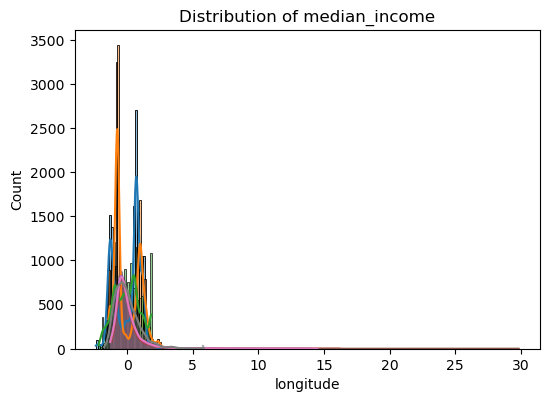

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

#Analyzing the distribution of each features
plt.figure(figsize = (20,15))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4, 4, 1)
    sns.histplot(X[col], kde = True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

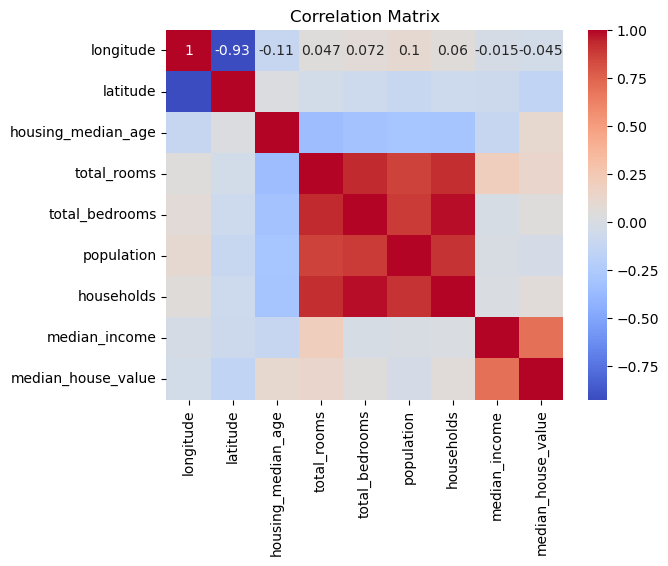

In [28]:
#Analyse the correlation between features and the taget value
correlation_matrix = scaled_data.corr()
sns.heatmap(correlation_matrix, annot = True , cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()